**NAME - Firasath**

In [1]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import wbgapi as wb
import sklearn
import seaborn as sns
import itertools as iter
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from numpy import array, exp

In [2]:
#Load world indicators data
dfram=pd.read_csv(r"C:\\Applied Data Science 3\Firasath\World Indicators.csv", low_memory=False)

In [4]:
#Taking a look at the information of the data
dfram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   1864 non-null   object
 1   Country Code   1862 non-null   object
 2   Series Name    1862 non-null   object
 3   Series Code    1862 non-null   object
 4   2017 [YR2017]  1862 non-null   object
 5   2018 [YR2018]  1862 non-null   object
 6   2019 [YR2019]  1862 non-null   object
 7   2020 [YR2020]  1862 non-null   object
 8   2021 [YR2021]  1862 non-null   object
dtypes: object(9)
memory usage: 131.4+ KB


In [3]:
#Taking a look at the data
dfram.head(6)

,Country Name,Country Code,Series Name,Series Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,29.7,30.9,31.9,33.2,..
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,13,13.85,15.1,15.9,..
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,80.9,81.6,82.3,82.6,..
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,97.69999695,96.61613464,97.69999695,97.69999695,..
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,97.09197235,95.58617401,97.07563019,97.06671143,..
5,Afghanistan,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,99.5,99.62602234,99.5,99.5,..


In [5]:
#Taking a look at the data in a transpose form
dfram.transpose().head(5)

,0,1,2,3,4,5,6,7,8,9,...,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866
Country Name,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Albania,Albania,Albania,...,World,World,World,World,World,NaN,NaN,NaN,Data from database: World Development Indicators,Last Updated: 04/27/2022
Country Code,AFG,AFG,AFG,AFG,AFG,AFG,AFG,ALB,ALB,ALB,...,WLD,WLD,WLD,WLD,WLD,NaN,NaN,NaN,NaN,NaN
Series Name,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,Access to clean fuels and technologies for coo...,...,Access to clean fuels and technologies for coo...,Access to electricity (% of population),"Access to electricity, rural (% of rural popul...","Access to electricity, urban (% of urban popul...",Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN
Series Code,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,...,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN
2017 [YR2017],29.7,13,80.9,97.69999695,97.09197235,99.5,14.89331245,78.7,60.5,91.6,...,85.16356381,88.5937661,81.39432527,97.29130406,68.51611328,NaN,NaN,NaN,NaN,NaN


In [6]:
#Choosing the indicators
indic_econ = ['NY.GDP.MKTP.CD','NE.IMP.GNFS.ZS']
countries = ["BRA","CHL",'BGD','LUX','IND','ARG','BMU','ESP','GBR','AUS']
indic_clm=['EG.CFT.ACCS.UR.ZS','EG.ELC.ACCS.UR.ZS']
econ_dta  = wb.data.DataFrame(indic_econ, countries, mrv=7)
clm_dta  = wb.data.DataFrame(indic_clm, countries, mrv=7)
#NY.GDP.MKTP.CD: GDP in USD for a country
#NE.IMP.GNFS.ZS: Total import of a country
#EG.CFT.ACCS.UR.ZS: Access to clean fuels and technologies  
#EG.ELC.ACCS.UR.ZS: Access to elctricity for urban people

In [7]:
# Economy world indicators
econ_dta.columns = [f.replace('YR','') for f in econ_dta.columns]      
econ_dta=econ_dta.stack().unstack(level=1)                             
econ_dta.index.names = ['Country_Code', 'Year']                           
econ_dta.columns                                                     
econ_dta.fillna(0)
econ_dta.head(8)

series             NE.IMP.GNFS.ZS  NY.GDP.MKTP.CD
Country_Code Year                                
ARG          2014       14.001315    5.263197e+11
             2015       11.780574    5.947493e+11
             2016       13.566793    5.575314e+11
             2017       13.969318    6.436287e+11
             2018       16.325850    5.248197e+11
             2019       14.518503    4.519324e+11
             2020       13.556325    3.892881e+11
AUS          2014       21.375957    1.467505e+12

In [10]:
#Climate world indicators
clm_dta.columns = [f.replace('YR','') for f in clm_dta.columns]      
clm_dta=clm_dta.stack().unstack(level=1)                             
clm_dta.index.names = ['Country_Code', 'Year']                           
clm_dta.columns                                                     
clm_dta.fillna(0)
clm_dta.head(8)

Year               EG.CFT.ACCS.UR.ZS  EG.ELC.ACCS.UR.ZS
Country_Code Year                                      
ARG          2014               99.9         100.000000
             2015               99.9          99.860687
             2016               99.9          99.942131
             2017               99.9         100.000000
             2018               99.9         100.000000
             2019               99.9         100.000000
             2020               99.9         100.000000
AUS          2014              100.0         100.000000

In [11]:
#Preprocess and clean the data
ab1=econ_dta.reset_index()
ab3=ab1.fillna(0)
ab2=clm_dta.reset_index()
ab4=ab2.fillna(0)

In [12]:
#Getting the required indicators
merged = pd.merge(ab3, ab4)
merged.head(8)

,Country_Code,Year,NE.IMP.GNFS.ZS,NY.GDP.MKTP.CD,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.UR.ZS
0,ARG,2014,14.001315,5.263197e+11,99.9,100.000000
1,ARG,2015,11.780574,5.947493e+11,99.9,99.860687
2,ARG,2016,13.566793,5.575314e+11,99.9,99.942131
3,ARG,2017,13.969318,6.436287e+11,99.9,100.000000
4,ARG,2018,16.325850,5.248197e+11,99.9,100.000000
5,ARG,2019,14.518503,4.519324e+11,99.9,100.000000
6,ARG,2020,13.556325,3.892881e+11,99.9,100.000000
7,AUS,2014,21.375957,1.467505e+12,100.0,100.000000


In [13]:
#Normalizing the merged data
merged1 = merged.iloc[:,2:]
merged.iloc[:,2:] = (merged1-merged1.min())/ (merged1.max() - merged1.min())
merged.head(8)

,Country_Code,Year,NE.IMP.GNFS.ZS,NY.GDP.MKTP.CD,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.UR.ZS
0,ARG,2014,0.013637,0.168759,0.999,1.000000
1,ARG,2015,0.000000,0.190971,0.999,0.985020
2,ARG,2016,0.010969,0.178891,0.999,0.993778
3,ARG,2017,0.013441,0.206837,0.999,1.000000
4,ARG,2018,0.027912,0.168272,0.999,1.000000
5,ARG,2019,0.016813,0.144614,0.999,1.000000
6,ARG,2020,0.010905,0.124279,0.999,1.000000
7,AUS,2014,0.058925,0.474264,1.000,1.000000


In [15]:
#K-means algorithm for Clustering
merged2 = merged.drop('Country_Code', axis = 1)
kmen = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(merged2)

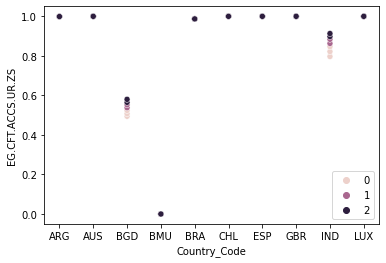

In [21]:
#Clustering basis the access to clean fuels and technologies  
sns.scatterplot(data=merged, x="Country_Code", y="EG.CFT.ACCS.UR.ZS", hue=kmen.labels_)
plt.legend(loc='lower right')
plt.show()

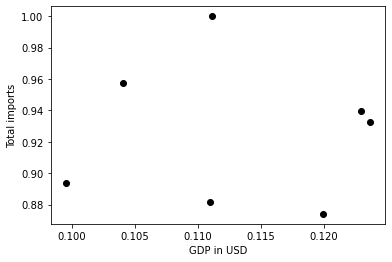

In [28]:
#Scatter plot visualisation to overview the relationship between GDP and total imports
e=merged[(merged['Country_Code']=='GBR')]
data = e.values
x, y = data[:, 2], data[:, 3]
plt.scatter(x, y,color="black")
plt.xlabel('GDP in USD')
plt.ylabel('Total imports')
plt.show()

Parameters of the function are:  [ 0.25050713 -0.44958556  0.22074309]
Covariance of the function is:  [[ 0.06446099 -0.11995485  0.05566193]
 [-0.11995485  0.22336416 -0.10371165]
 [ 0.05566193 -0.10371165  0.0481855 ]]


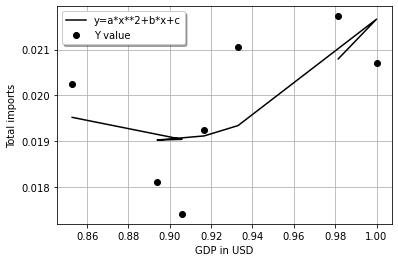

In [30]:
#curve_fit function code for country with high access to clean fuels and technologies to understand the relationship between GDP and total imports
f=merged[(merged['Country_Code']=='LUX')]
data1 = f.values
x, y = data1[:, 2], data1[:, 3]

def funct(x, a, b, c):
    return a*x**2+b*x+c
par, cov = curve_fit(funct, x, y)
par, _ = curve_fit(funct, x, y)
print("Parameters of the function are: ", par)
print("Covariance of the function is: ", cov)


a, b, c = par[0], par[1], par[2]
yfit =a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="black")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Y value",color="black")
    plt.xlabel('GDP in USD')
    plt.ylabel('Total imports')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

Parameters of the function are:  [-8.15688551  0.13133498  0.10507806]
Covariance of the function is:  [[ 8.23997071e+02 -1.05203992e+02  3.19069777e+00]
 [-1.05203992e+02  1.35640101e+01 -4.15806741e-01]
 [ 3.19069777e+00 -4.15806741e-01  1.29204642e-02]]


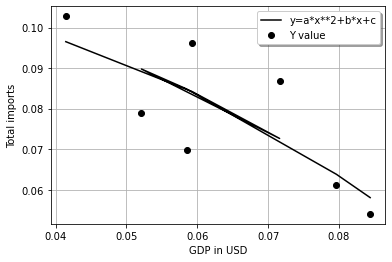

In [31]:
#curve_fit function code for country with medium access to clean fuels and technologies to understand the relationship between GDP and total imports
g=merged[(merged['Country_Code']=='BGD')]
data2 = g.values
x, y = data2[:, 2], data2[:, 3]

def funct(x, a, b, c):
    return a*x**2+b*x+c
par, cov = curve_fit(funct, x, y)
par, _ = curve_fit(funct, x, y)
print("Parameters of the function are: ", par)
print("Covariance of the function is: ", cov)


a, b, c = par[0], par[1], par[2]
yfit =a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="black")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Y value",color="black")
    plt.xlabel('GDP in USD')
    plt.ylabel('Total imports')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

Parameters of the function are:  [ 0.37902298 -0.05294324  0.00198311]
Covariance of the function is:  [[ 1.12687975e+00 -1.71523900e-01  6.45665010e-03]
 [-1.71523900e-01  2.61484607e-02 -9.85878215e-04]
 [ 6.45665010e-03 -9.85878215e-04  3.72342707e-05]]


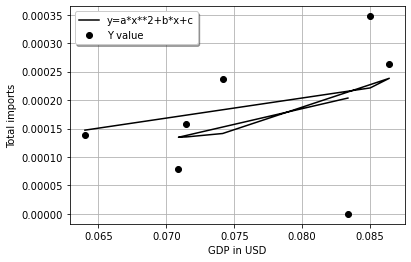

In [32]:
#curve_fit function code for country with low access to clean fuels and technologies to understand the relationship between GDP and total imports
h=merged[(merged['Country_Code']=='BMU')]
data3 = h.values
x, y = data3[:, 2], data3[:, 3]

def funct(x, a, b, c):
    return a*x**2+b*x+c
par, cov = curve_fit(funct, x, y)
par, _ = curve_fit(funct, x, y)
print("Parameters of the function are: ", par)
print("Covariance of the function is: ", cov)


a, b, c = par[0], par[1], par[2]
yfit =a*x**2+b*x+c

import warnings

with warnings.catch_warnings(record=True):
    plt.plot(x, yfit, label="y=a*x**2+b*x+c",color="black")
    plt.grid(True)
    plt.plot(x, y, 'bo', label="Y value",color="black")
    plt.xlabel('GDP in USD')
    plt.ylabel('Total imports')

    plt.legend(loc='best', fancybox=True, shadow=True)

    plt.show() 

**The above fitted line plots shows that for the country which has a high access to clean fuels and technologies, the relationship between the GDP and total import is indirect at the beginning but as the GDP of the country crossed 0.90 the relationship becomes direct. For the the country which has a medium access to clean fuels and technologies the relationship between the GDP and total import is indirect. For the country which has a low access to clean fuels and technologies the relationship between the GDP and total import is direct.**

In [33]:
#Function definition of the error function
def err_ranges(x, func, param, sigma):
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 